#Kepler-42 (KOI-961) KIC 8561063  / Kepler-42 d gezegeni incelendi.

In [5]:
from lightkurve import search_targetpixelfile

pixelfile = search_targetpixelfile("KIC 8561063", quarter=16).download(quality_bitmask='hardest');

D:\anaconda\envs\simulation\Lib\site-packages\lightkurve\search.py:424: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


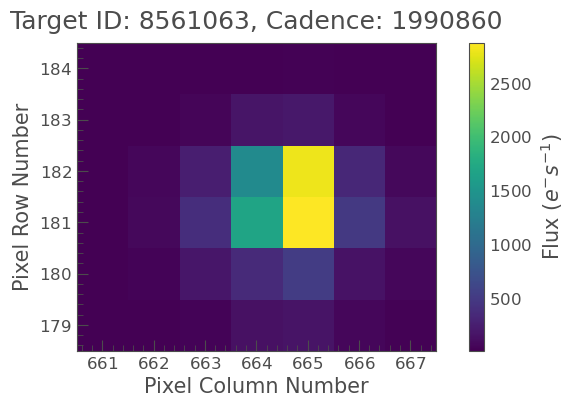

In [7]:
import matplotlib.pyplot as plt
pixelfile.plot(frame=1000)
plt.show()

In [14]:
pixelFile = search_targetpixelfile('KIC 8561063', quarter=4).download()

In [15]:
lc.time, lc.flux

(<Time object: scale='tdb' format='bkjd' value=[1472.10759381 1472.10827489 1472.10895597 ... 1477.31597489 1477.31665598
  1477.31733706]>,
 <Quantity [13454.116, 13396.667, 13349.836, ..., 13352.266, 13298.58 ,
            13321.22 ] electron / s>)

In [17]:
lc = pixelFile.to_lightcurve(aperture_mask=pixelFile.pipeline_mask)

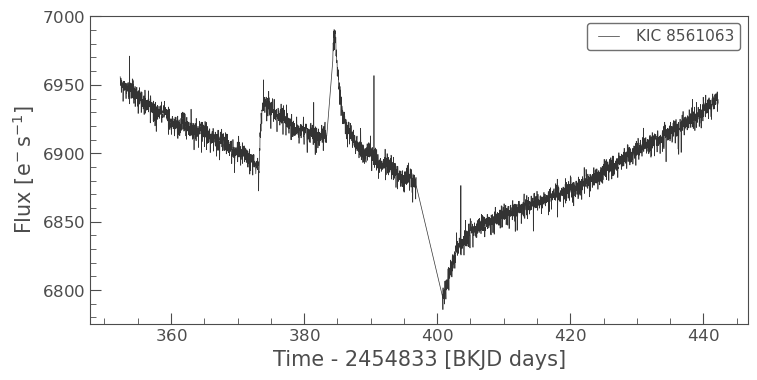

In [18]:
lc.plot()
plt.show()

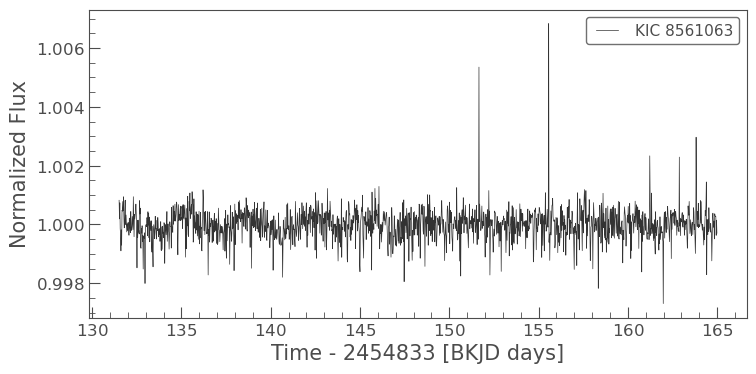

In [10]:
flat_lc = lc.flatten(window_length=401)
flat_lc.plot()
plt.show()

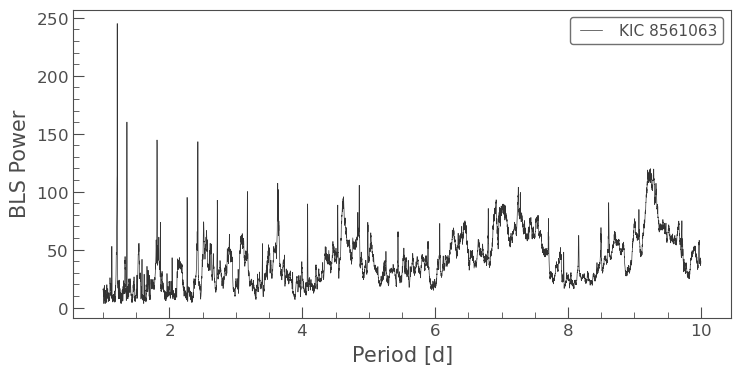

In [37]:
import numpy as np
periodogram = flat_lc.to_periodogram(
    method="bls", 
    period=np.arange(1, 10, 0.001),
     # hata verdiği için 0.3 ten küçük bir değer girildi
)
periodogram.plot()
plt.show()

In [38]:
best_fit_period = periodogram.period_at_max_power
print('Best fit period: {:.5f}'.format(best_fit_period))

Best fit period: 1.21400 d


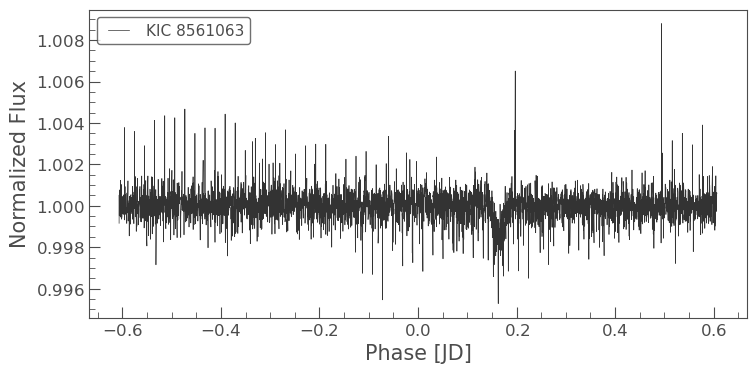

In [35]:
folded_lc = flat_lc.fold(period=1.214)
folded_lc.plot()
plt.show()

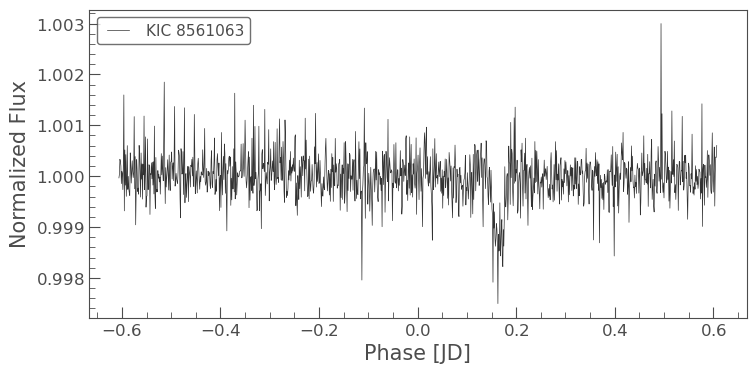

In [40]:
binned_lc = folded_lc.bin(time_bin_size=0.001)
binned_lc.plot()
plt.show()

In [4]:
from lightkurve import search_targetpixelfile
import lightkurve as lk
search_result = lk.search_targetpixelfile('Kepler-42 d', mission='Kepler')
tpf = search_result.download(quality_bitmask='default')

D:\anaconda\envs\simulation\Lib\site-packages\lightkurve\search.py:424: LightkurveWarning: Warning: 43 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


In [5]:
tpf.mission
tpf.targetid

8561063

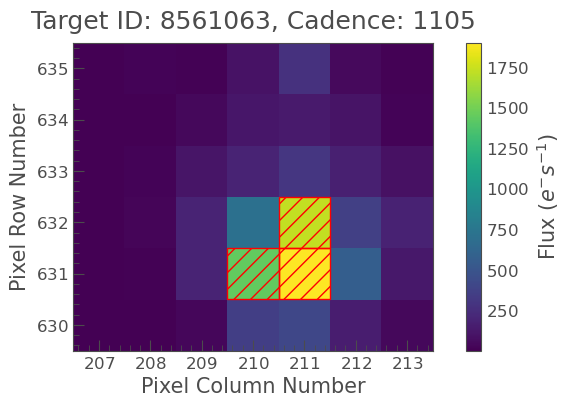

In [7]:
import matplotlib.pyplot as plt
tpf.plot(aperture_mask=tpf.pipeline_mask)
plt.show()

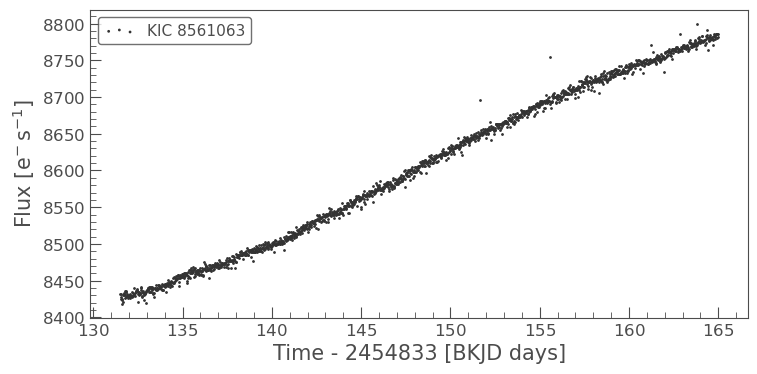

In [8]:
lc = tpf.to_lightcurve()  #pikseli ışık eğrisine dönüştürme
lc.scatter()
plt.show()

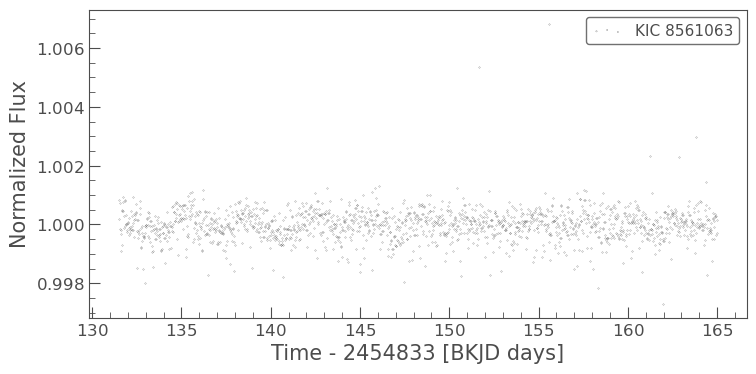

In [37]:
mask = (flat_lc.time.value < 165) | (flat_lc.time.value > 130)
masked_lc = flat_lc[mask]
masked_lc.scatter(s=0.1)
plt.show()

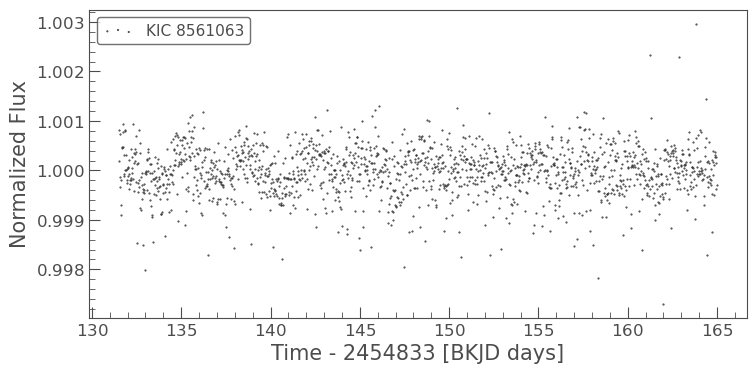

In [36]:
clipped_lc = masked_lc.remove_outliers(sigma=6)
clipped_lc.scatter(s=1)
plt.show()

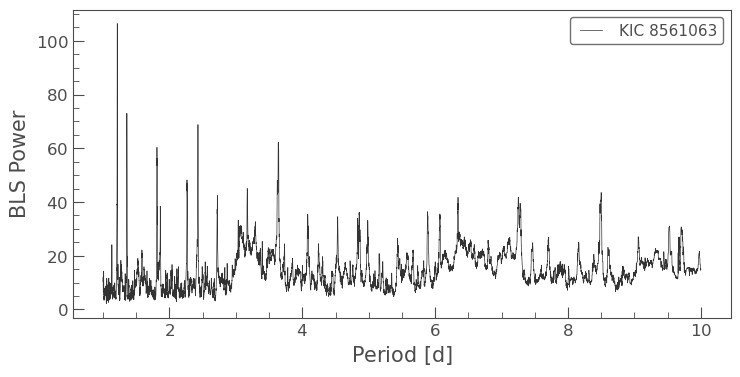

In [29]:
import numpy as np
periodogram = clipped_lc.to_periodogram(method="bls", period=np.arange(1, 10, 0.001))
periodogram.plot()
plt.show()

In [30]:
best_fit_period = periodogram.period_at_max_power
print('Best fit period: {:.3f}'.format(best_fit_period))

Best fit period: 1.215 d


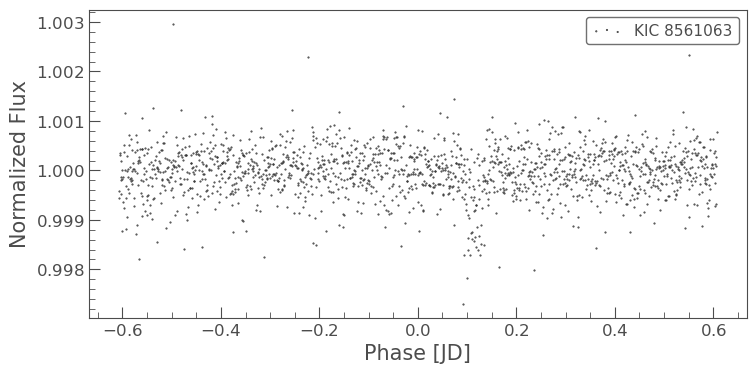

In [34]:
folded_lc = clipped_lc.fold(period=1.215)
folded_lc.scatter(s=1)
plt.show()